# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q2, and one of Q1 or Q3.

In [1]:
! git clone https://github.com/ds4e/wrangling

Cloning into 'wrangling'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 63 (delta 2), reused 1 (delta 0), pack-reused 56 (from 1)
Receiving objects: 100% (63/63), 13.96 MiB | 8.90 MiB/s, done.
Resolving deltas: 100% (12/12), done.


**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#1
df = pd.read_excel("/content/GSAF5.xls")

#2
df.drop(['pdf', 'href formula', 'href', 'Case Number', 'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22'], axis=1, inplace=True)
print(df.head())

                  Date    Year        Type        Country              State  \
0  2025-01-23 00:00:00  2025.0  Unprovoked      Australia  Western Australia   
1  2025-01-22 00:00:00  2025.0  Unprovoked      Australia  Western Australia   
2  2025-01-11 00:00:00  2025.0    Provoked            USA             Hawaii   
3  2025-01-02 00:00:00  2025.0  Unprovoked  New Caledonia       Grande Terre   
4  2025-01-02 00:00:00  2025.0  Unprovoked      Australia    South Australia   

                                  Location      Activity  \
0                           Shipwreck Cove       Bathing   
1                           Cheynes beach        Surfing   
2            Off Haleiwa Boat Harbour Oahu        Diving   
3              Islet of Kendek near Koumac  Spearfishing   
4  Granites Beach near Westall Streaky Bay       Surfing   

                                     Name Sex Age  \
0                                    Boy    M  12   
1                             Dale Kittow   M  37   

<ipython-input-39-73e224e591b6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].replace(0, np.nan, inplace=True) # Replace 0000 values with nan


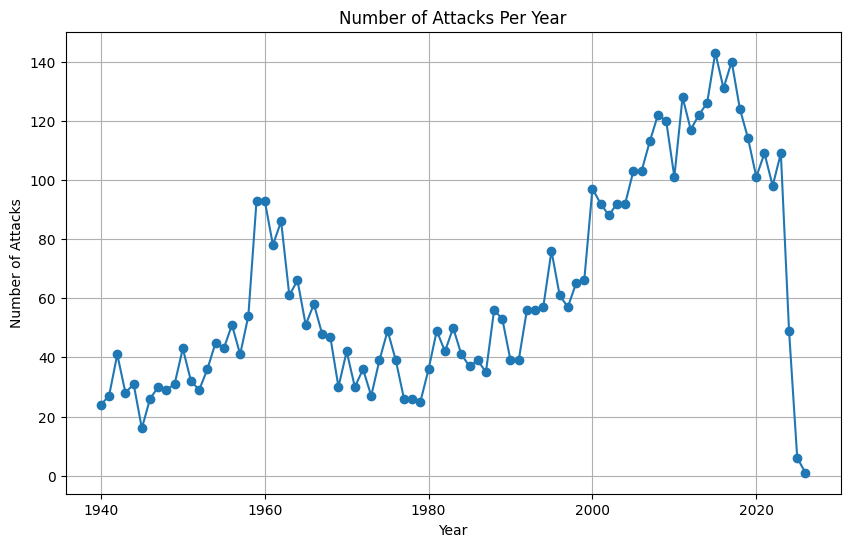

In [39]:
#3
df['Year'].replace(0, np.nan, inplace=True) # Replace 0000 values with nan
#now, we have year values from 5-2025.
year_df = df[df['Year'] >= 1940]

# Group by year and count the number of attacks
attacks_per_year = year_df.groupby('Year').size()

# Plot the data
plt.figure(figsize=(10, 6))
attacks_per_year.plot(kind='line', marker='o')

plt.title('Number of Attacks Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.show()
# I guess shark attacks are kind of increasing over time? maybe they don't have as much recent data

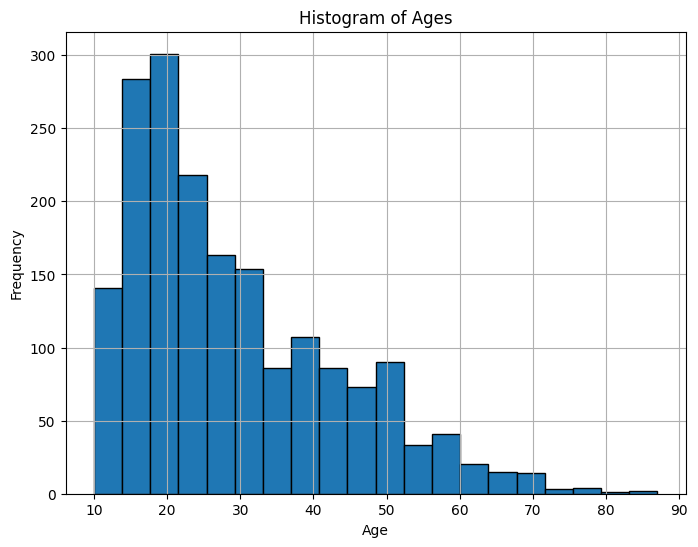

In [40]:
#4
# Extract the first two consecutive digits and remove any non-digit characters (this will round down something like '30s'
# and remove something like 'middle aged')
df['Age'] = df['Age'].str.extract(r'(\d{2})', expand=False)

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

plt.figure(figsize=(8, 6))
plt.hist(df['Age'].dropna(), bins=20, edgecolor='black')  # dropna to avoid NaN values
plt.title('Histogram of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [41]:
#5
# Count how many of the victims were Male (denoted by 'M')
male_count = df['Sex'].value_counts().get('M', 0)

# Total number of attacks (total number of rows in the DataFrame)
total_attacks = len(df)

# Calculate the percentage of attacks that were Male
male_percentage = (male_count / total_attacks) * 100

print(f'Percentage of Male Victims: {male_percentage:.2f}%')

Percentage of Male Victims: 80.28%


In [42]:
#6
df['Type'] = df['Type'].apply(lambda x: x if x in ['Provoked', 'Unprovoked'] else 'Unknown')
print(f'Number of Unprovoked Attacks: {len(df[df["Type"] == "Unprovoked"])} \n')
#7
df['Fatal Y/N'] = df['Fatal Y/N'].apply(lambda x: x if x in ['Y', 'N'] else 'Unknown')
#8
unprovoked_df = df[df['Type'] == 'Unprovoked']
unp_male_count = unprovoked_df['Sex'].value_counts().get('M', 0)
unp_female_count = unprovoked_df['Sex'].value_counts().get('F', 0)
print(f'Number of Unprovoked Attacks on Men: {unp_male_count}')
print(f'Number of Unprovoked Attacks on Women: {unp_female_count} \n')

provoked_df = df[df['Type'] == 'Provoked']
total_prov_attacks = len(provoked_df)
total_unprov_attacks = len(unprovoked_df)
prov_fatal_count = len(provoked_df[provoked_df['Fatal Y/N'] == 'Y'])
unprov_fatal_count = len(unprovoked_df[unprovoked_df['Fatal Y/N'] == 'Y'])
fatal_prov_percentage = (prov_fatal_count / total_prov_attacks) * 100
fatal_unprov_percentage = (unprov_fatal_count / total_unprov_attacks) * 100

print(f'Provoked Fatal Percentage: {fatal_prov_percentage:.2f}%')
print(f'Unprovoked Fatal Percentage: {fatal_unprov_percentage:.2f}%\n')

total_male_attacks = len(df[df['Sex'] == 'M'])
total_female_attacks = len(df[df['Sex'] == 'F'])
male_fatal_count = len(df[(df['Sex'] == 'M') & (df['Fatal Y/N'] == 'Y')])
female_fatal_count = len(df[(df['Sex'] == 'F') & (df['Fatal Y/N'] == 'Y')])
fatal_male_percentage = (male_fatal_count / total_male_attacks) * 100
fatal_female_percentage = (female_fatal_count / total_female_attacks) * 100

print(f'Male Fatality Rate: {fatal_male_percentage:.2f}%')
print(f'Female Fatality Rate: {fatal_female_percentage:.2f}%')
print(f'I like sharks! :)')

Number of Unprovoked Attacks: 5153 

Number of Unprovoked Attacks on Men: 4311
Number of Unprovoked Attacks on Women: 670 

Provoked Fatal Percentage: 3.14%
Unprovoked Fatal Percentage: 24.28%

Male Fatality Rate: 22.07%
Female Fatality Rate: 15.15%
I like sharks! :)


In [46]:
#9 something weird is happening what the
# print(df.columns)
# bruh that's so annoying!!!
df.rename(columns={'Species ': 'Species'}, inplace=True)
df['Species'] = df['Species'].astype(str)
df['White_Shark'] = df['Species'].str.split().apply(lambda x: 'White' in x)
white_shark_count = df['White_Shark'].sum()
total_attacks = len(df)
proportion_white_shark = (white_shark_count / total_attacks) * 100
print(f'Proportion of attacks by White Sharks: {proportion_white_shark:.2f}%')


Proportion of attacks by White Sharks: 7.19%


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  **The paper is about data tidying, a practice that makes data cleaning simpler by being deliberate about your tables and their collumns and rows.**
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  **The standard creates a baseline system with which to clean data; this way, you don't need to come up with a new system every time. It is also developed such that tools can work hand in hand without much translation.**
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  **The first sentence means that while tidy datasets hope to be uniform, messy datasets (like families) often can be messy in unique and never-before-seen ways. The second sentence means that for a specific dataset, defining observations and variables is easy, but it's difficult to define these concepts in a broad way that applies to all datasets.**
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  **Values are data points (usually numbers or strings) that belong to both a variable and an observation. Variables contain all values with the same attribute across units, while observations contain all values that have been measured upon the same unit, across all attributes.**
  5. How is "Tidy Data" defined in section 2.3?
  **Tidy data is defined as "a standard way of mapping a dataset to its structure." With Tidy Data, each variable forms a collumn, each observation forms a row, and each type of observational unit forms a table.**
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  **The 5 most common problems iwth messy data sets are: collumn headers are values, not variable names; multiple variables are stored in one collumn; variables are stored in both rows and collumns; multiple types of observational units are stored in the same table; a single observational unit is stored in multiple tables. In Table 4, column headers are values, not variable names. Melting a dataset is stacking it, by turning collumns into rows.**
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  **In table 11, collumn headers are values (days and months in the year). In contrast, table 12 melts these collumns into rows, making the data more understandable and tidy.**
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?
  **The "chicken-and-egg" problem describes how developing tidy data independentely fails to increase productivity without also developing tools with which it is used. Wickham hopes that others build on tidy data and develop better data strategies, so that workflow can be improved and data cleaning can be more efficient.**

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?